In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

width = 12
height = 7
plt.rcParams["figure.figsize"] = (width, height)

import graphviz
import pandas as pd
import numpy as np
import tflscripts
import pickle

configuration = tflscripts.read_configuration()
df = pd.read_pickle('results.p')

df = df.loc[df.f1 >= 0.5]

df = df.sort_values(by='f1', ascending=False)
df = df.drop_duplicates(['source_dataset', 'target_dataset', 'source_device', 'target_device', 'label'], keep='first')

df['space_transfer'] = df['source_room'] + ' – ' + df['target_room']
df_mites = df.loc[(df['source_device_type'] == 'Mite') & (df['target_device_type'] == 'Mite')]

df_without_transfer = df.loc[df.type_of_transfer == 'No transfer']
df_transfer = df.loc[df.type_of_transfer != 'No transfer']

df_without_transfer_mites = df_mites.loc[df_mites.type_of_transfer == 'No transfer']
df_transfer_mites = df_mites.loc[df_mites.type_of_transfer != 'No transfer']

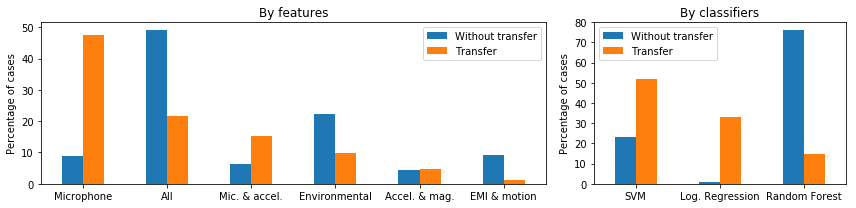

In [37]:
plt.rcParams["figure.figsize"] = (12, 3)

from matplotlib import gridspec

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
# f, axes = plt.subplots(1, 2, sharex=False, sharey=True)

def rename_classifier(classifier):
    return {
        'SVM': 'SVM',
        'LogisticRegression': 'Log. Regression',
        'RandomForestClassifier': 'Random Forest'
    }[classifier]

def rename_features(features):
    return {
        'All': 'All',
        'Microphone': 'Microphone',
        'Microphone & accelerometer': 'Mic. & accel.',
        'Environmental': 'Environmental',
        'EMI & motion': 'EMI & motion',
        'Accelerometer & magnetometer': 'Accel. & mag.',
    }[features]



features = pd.concat([
    df_without_transfer.features_name.value_counts() / len(df_without_transfer) * 100,
    df_transfer.features_name.value_counts() / len(df_transfer) * 100
], axis=1)
features.columns = ['Without transfer', 'Transfer']
features = features.sort_values(by='Transfer', ascending=False)
features.index = [rename_features(c) for c in features.index]
features.plot.bar(ax=ax0)

matplotlib.pyplot.sca(ax0)
plt.title('By features')
plt.ylabel('Percentage of cases')
plt.xticks(rotation=0)

classifiers = pd.concat([
    df_without_transfer.classifier.value_counts() / len(df_without_transfer) * 100,
    df_transfer.classifier.value_counts() / len(df_transfer) * 100
], axis=1)
classifiers.columns = ['Without transfer', 'Transfer']
classifiers = classifiers.sort_values(by='Transfer', ascending=False)
classifiers.index = [rename_classifier(c) for c in classifiers.index]
classifiers.plot.bar(ax=ax1)
matplotlib.pyplot.sca(ax1)
plt.ylabel('Percentage of cases')
plt.title('By classifiers')
plt.xticks(rotation=0)
plt.tight_layout()

plt.tight_layout()

plt.savefig('../plots/model_representations_performance.pdf')
plt.show()

In [26]:
features.index

Index(['Microphone', 'All', 'Microphone & accelerometer', 'Environmental',
       'Accelerometer & magnetometer', 'EMI & motion'],
      dtype='object')